Shahnaz Abdul Hameed

Statistical Mechanics

Maxwell-Boltzmann distribution : 
    *$f(E)= Aexp(-E/kT)$*

Since probability*(f(E))* of finding a particle decreases as it's kinetic energy*(E)* increases

$f(v_{x}) = (\frac{m}{2\pi kT})^\frac{1}{2}  \exp(\frac{mv_{x}^2}{2kT})$

$\implies f(v) = 4\pi (\frac{m}{2\pi kT})^\frac{3}{2} v^2  \exp(\frac{m(v_{x}^2+v_{y}^2+v_{z}^2)}{2kT})$
for 3-D, since $\text{volume element}= 4 \pi v^2 dv$

$f(v) =4\pi (\frac{m}{2\pi kT})^\frac{3}{2} v^2  \exp(\frac{mv^2}{2kT})$

$v_{rms} = (\frac{3kT}{m})^\frac{1}{2}$ ;
$v_{mp} = (\frac{2kT}{m})^\frac{1}{2}$ ;
$v_{ave} = (\frac{8kT}{\pi m})^\frac{1}{2}$

or

$ v_{rms} = \sqrt \int_{0}^{\infty}v^2 f(v) dv$ ;$v_{ave} = \int_{0}^{\infty}v f(v)dv$;

$\frac{df(v)}{dv}=0 \text{ solve for $v_{mp}$} $ 

In [1]:
import numpy as np
from numpy import pi,zeros,sqrt
import sympy as sp
from sympy import integrate
import math
import matplotlib.pyplot as plt

In [2]:
M = int(input("Enter the molar mass (gm)"))
m = M/(6.022e+26)
k = 1.38e-23

Enter the molar mass(gms): 32


In [3]:

def max(v,T):
    a = m/(2*k*T)
    b = (a/pi)**1.5
    c= 1/np.exp(a*v*v)
    f = 4*pi*b*v*v*c
    return f

In [5]:
n= int(input("How many temperatures do you want the speeds for:"))
T = zeros(n)
for i in range(n):
    T[i]=float(input("Enter temperature in K"))

HOw many temperatures do you want the speeds for:2
Enter temperature in K300
Enter temperature in K900


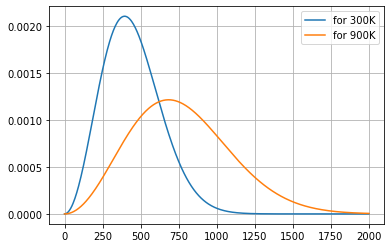

In [6]:
x = 500
V = np.linspace(0,2000,x)   
Max = zeros(x)
for j in range(n):
    for i in range(x):
        Max[i] = max(V[i],T[j])

    plt.plot(V,Max)
    
plt.grid()
plt.legend(["for 300K","for 900K"])

In [7]:
Vr  = zeros(n)
Vmp =zeros(n)
Vav = zeros(n)
for i in range(n):
    v_rms = sqrt(3*k*T[i]/m)
    v_mp  = sqrt(2*k*T[i]/m)
    v_av  = sqrt(8*k*T[i]/(pi*m))

    print("Speeds at {} K temperature using formulae:\n v(rms): {}m/s \n v(most probable): {}m/s \n v(average): {}m/s\n".format(T[i],v_rms,v_mp,v_av))
    Vr[i]  = v_rms
    Vmp[i] = v_mp
    Vav[i] = v_av

Speeds at 300.0 K temperature using formulae:
 v(rms): 483.4551426968173m/s 
 v(most probable): 394.73947104387724m/s 
 v(average): 445.41579555621337m/s

Speeds at 900.0 K temperature using formulae:
 v(rms): 837.3688703313493m/s 
 v(most probable): 683.708819600859m/s 
 v(average): 771.4827883970734m/s



In [8]:
def max(v,T):
    a = m/(2*k*T)
    b = (a/sp.pi)**1.5
    c= sp.exp(-a*v*v)
    f = 4*pi*b*v*v*c
    return f

In [9]:
a = 0
b = math.inf
v = sp.Symbol('v')

for i in range(n):
    v_av = integrate(v*max(v,T[i]),(v,a,b))
    v_av = eval(str(v_av))
    v_rms2 =  integrate(v*v*max(v,T[i]),(v,a,b))
    v_rms = sp.sqrt(v_rms2)
    v_rms = eval(str(v_rms))
    print("Speeds at {} Kelvin temperature using integration:\n v(rms): {}m/s \n v(average): {}m/s\n".format(T[i],v_rms,v_av))        

Speeds at 300.0 K temperature using integration:
 v(rms): 483.4551426968176m/s 
 v(average): 445.41579555621314m/s

Speeds at 900.0 K temperature using integration:
 v(rms): 837.3688703313484m/s 
 v(average): 771.482788397074m/s

